In [1]:
# Class of k-Nearest Neigbor Classifier


class kNN():
    def __init__(self, k = 3, exp = 2):
    # constructor for kNN classifier 
    # k is the number of neighbor for local class estimation
    # exp is the exponent for the Minkowski distance
        self.k = k
        self.exp = exp
      
    def fit(self, X_train, Y_train):
    # training k-NN method
    # X_train is the training data given with input attributes. n-th row correponds to n-th instance.
    # Y_train is the output data (output vector): n-th element of Y_train is the output value for n-th instance in X_train.
        self.X_train = X_train
        self.Y_train = Y_train  
         
    def normalize(self, X_test):
        minn = self.X_train.min()
        maxx = self.X_train.max()
        
        self.X_train = (self.X_train - minn)/(maxx - minn)
        X_test = (X_test - minn)/(maxx - minn)
        
        return self.X_train, X_test
            
    def getDiscreteClassification(self, X_test):
    # predict-class k-NN method
    # X_test is the test data given with input attributes. Rows correpond to instances
    # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test
    
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

   
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # Note that the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
            # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
            # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
                 
            # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
            y_pred_test = predictions.index[0]

            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test

    
    def Minkowski_distance(self, x1, x2):
    # computes the Minkowski distance of x1 and x2 for two labeled instances (x1,y1) and (x2,y2)
    
        # Set initial distance to 0
        distance = 0
    
        # Calculate Minkowski distance using the exponent exp
        for i in range(len(x1)):
            distance = distance + abs(x1[i] - x2[i])**self.exp
        
        distance = distance**(1/self.exp)
    
        return distance
    
    def getClassProbs(self, X_test):
    # gives probabilities for each class
    # X_test is the test data given with input attributes. Rows correpond to instances
    # Method outputs probabilities dataframe Y_prob_test: colums represent classes, values of n-th row are the probabilities
    # for that n-th instance and the corresponding class
    
        classes_data = self.Y_train.unique()
        Y_prob_test = pd.DataFrame(columns=classes_data)
   
    ## The part below is taken from getDiscreteClassification method. For all comments, check there ##
    
        for i in range(len(X_test)):  
            test_instance = X_test.iloc[i]
            
            distances = [] 
          
            for j in range(len(self.X_train)):  
                train_instance = self.X_train.iloc[j] 
                distance = self.Minkowski_distance(test_instance, train_instance)
                distances.append(distance)
        
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            predictions = self.Y_train[df_knn.index].value_counts()
            
    ## End of the reused code ##
    
            class_and_prob = {} # a new dictionary for n-th X_test instance that has classes as keys and probabilities as
                                # corresponding values
            
            for c in classes_data:
                class_and_prob[c] = 0
                if c in predictions.index:
                    class_and_prob[c] = predictions[c]/predictions.sum()
                 
            # add the probability y_prob_test to the probability vector Y_prob_test for all the test instances in X_test
            Y_prob_test = Y_prob_test.append(class_and_prob, ignore_index = True)
        
        return Y_prob_test

    def getPrediction(self, X_test):
    # computes for all the test instances in  X_test  regression  values  for  the  output  attribute
    
        Y_pred_regr = pd.DataFrame(columns=["regression"]) 
        
       ## The part below is taken from getDiscreteClassification method. For all comments, check there ##
    
        for i in range(len(X_test)):   
            test_instance = X_test.iloc[i] 
            
            distances = []  
          
            for j in range(len(self.X_train)): 
                train_instance = self.X_train.iloc[j]
                distance = self.Minkowski_distance(test_instance, train_instance) 
                distances.append(distance) 
                
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            predictions = self.Y_train[df_knn.index]
            
        ## End of the reused code ##
        
            # Use the formula for k-NN Regression: divide the sum of all prediction values by the number of neighbours 
            # considered
            Y_pred_regr = Y_pred_regr.append({'regression': predictions.sum()/self.k}, ignore_index = True)
            
        return Y_pred_regr
            
            

Question b

Test the kNN classifier on the diabetis and glass classification data sets (see Appendix A) for the case when the data is not normalized and the case when the data is normalized. Indicate whether the training and hold-out accuracy rates improve with 
normalization. 

Answer: (see the next block of code for plots)

GLASS: The first plot shows the accuaracy for not normalized data, the second plot shows the accuracy of normalized data. We observe that, if normalizing the data, there is a slight improvement by at most about 5% for k in range approximately [0,5], however in area where k is in range (5,30] the improvement fluctuate insignificantely. Train accuracy on average goes insignificantly higher when normalizing.

DIABETES: The first plot shows the accuaracy for not normalized data, the second plot shows the accuracy of normalized data. We observe that, the normalized case accuracy is a little lower for most of the points and honestly, I do not know why. It takes about 20 minutes to make the plots for diabetes, so let's move on to more fun parts!!

Test the kNN classifier on the glass classification data sets the data is normalized for different values of the exp parameter  of  the  Minkowski  distance. Indicate whether the training and  hold-out accuracy rates changes due to exp. 

Answer: (see the second next block of code for plots)

There are just three points plotted on the graph and we see that accuracy is dropped by more that 55% for training instances, and more than 20% for test instances, when changing from 100 to 10000. It can be explained by the fact that as the number of exp approaches infinity, the return Minkowski distance becomes supremum of all the distances, which, of course, makes the accuracy decrease. When exp is changing from 2 to 100, however, the accuracy for training data increases, but for test instances it decreases.

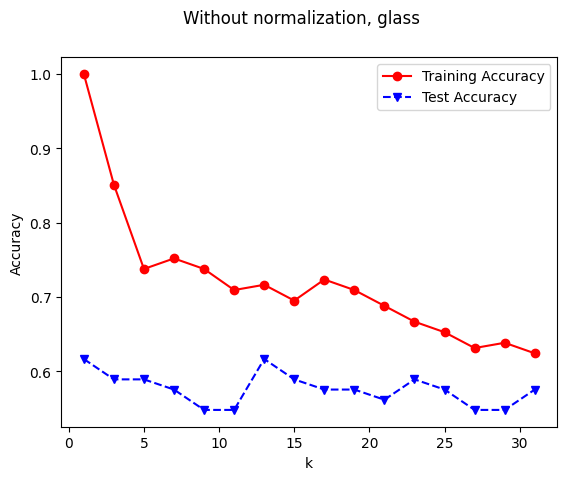

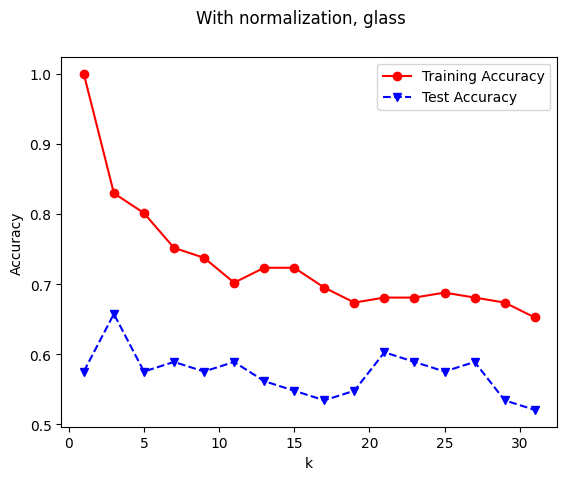

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from numpy.random import random
from sklearn.metrics import accuracy_score

##################################################
# Hold-out testing, glass: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))

#########################################
# Without normalization, glass
#########################################

index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
#     class_prob_df = clf.getClassProbs(X_test)
#     print(class_prob_df)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1  
    

# Plot of training and test accuracies
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.suptitle('Without normalization, glass')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

#########################################
# With normalization, glass
#########################################

index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    X_train, X_test = clf.normalize(X_test)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.suptitle('With normalization, glass')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

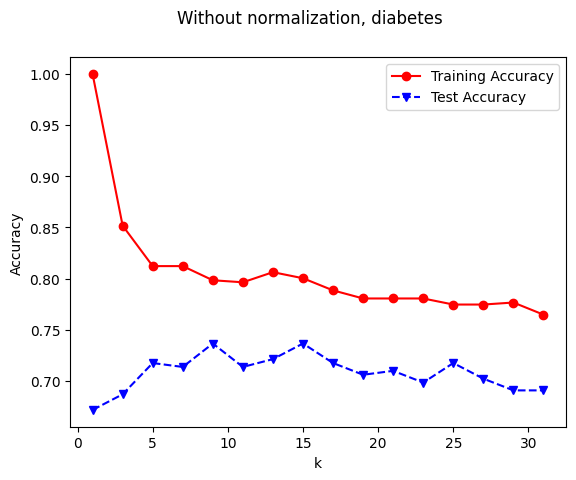

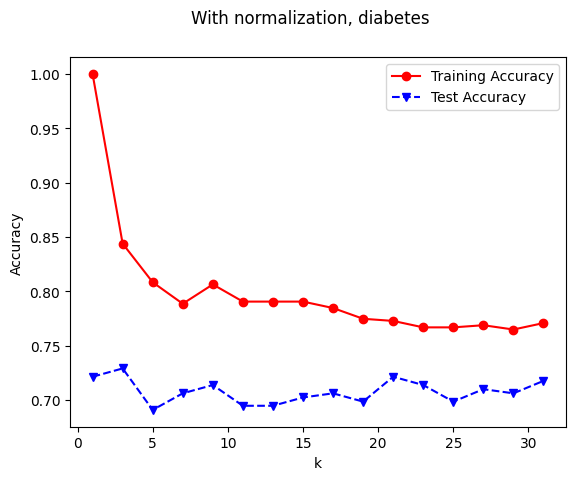

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from numpy.random import random
from sklearn.metrics import accuracy_score

##################################################
# Hold-out testing, glass: Training and Test set creation
##################################################

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))

#########################################
# Without normalization, diabetes
#########################################

index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1  
    

# Plot of training and test accuracies
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.suptitle('Without normalization, diabetes')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

#########################################
# With normalization, diabetes
#########################################
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    X_train, X_test = clf.normalize(X_test)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.suptitle('With normalization, diabetes')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

Text(0, 0.5, 'Accuracy')

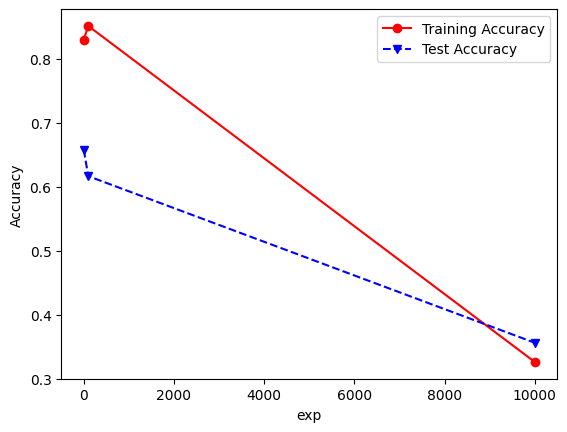

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from numpy.random import random

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))


index = 0 
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    X_train, X_test = clf.normalize(X_test)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')

Question C

Add to class kNN method getClassProbs that computes for all the test instances in X_test the posterior class probabilities. This means that the method computes for each row (instance) in X_test a row with probability of class 1, probability of class 
2, and probability of class N. Combine the rows of the posterior class probabilities in pandas.DataFrame object that will be the output of the method getClassProbs. 

Answer: Comments are in the method getClassProbs itself. The result is displayed below. k = 4 is used for demonstration.

In [5]:
# Posterior class probabilities for glass dataset

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)
test_g = kNN(4)
test_g.fit(X_train, Y_train)
post_probs_g = test_g.getClassProbs(X_test)
display(post_probs_g)

# Posterior class probabilities for diabetes dataset

data_d = pd.read_csv('diabetes.csv')
data_d.head()
Y = data_d['class']
X = data_d.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)
test_d = kNN(4)
test_d.fit(X_train, Y_train)
post_probs_d = test_d.getClassProbs(X_test)
display(post_probs_d)

,'build wind float','build wind non-float',headlamps,'vehic wind float',containers,tableware
0,0.75,0.00,0.00,0.25,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.75,0.00,0.25,0.00
3,0.25,0.75,0.00,0.00,0.00,0.00
4,0.75,0.25,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...
68,0.50,0.00,0.00,0.50,0.00,0.00
69,0.00,0.25,0.25,0.50,0.00,0.00
70,0.00,0.25,0.50,0.00,0.00,0.25
71,0.00,1.00,0.00,0.00,0.00,0.00


,tested_positive,tested_negative
0,0.75,0.25
1,0.25,0.75
2,0.75,0.25
3,0.00,1.00
4,0.50,0.50
...,...,...
257,0.00,1.00
258,1.00,0.00
259,1.00,0.00
260,0.00,1.00


In [6]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

Add to class kNN method getPrediction that computes for all the test instances in X_test regression values for the output  attribute. This means that the method computes for each instance (row) in X_test a regression value equal to the average 
of y values in Y_train of the  k-nearest neighbors of the instance in X_train. Combine the computed regression values for all  the instances in X_test in pandas.DataFrame object that will be the output of the method getPrediction.   

Test the method getPrediction on the autoprice data set which is a regression data set (see Appendix A). For that purpose you can adapt the test script tha you have already  used  for  Task  B.  Please  use  mean  absolute  error  as  the  main  metric  for estimating regression performance1 instead of the accuracy rate. To compute the mean absolute error you can use method mean_absolute_error from sklearn.metrics.  

Answer: see the graph plot below

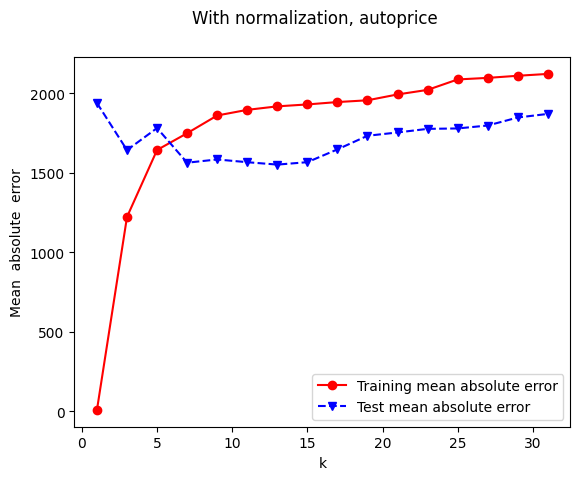

In [7]:
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)
data.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))

#########################################
# Without normalization, glass
#########################################

index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    X_train, X_test = clf.normalize(X_test)
    Y_predTrain = clf.getPrediction(X_train)
    Y_predTest = clf.getPrediction(X_test)
    trainAcc[index] = mean_absolute_error(Y_train, Y_predTrain)
    testAcc[index] = mean_absolute_error(Y_test, Y_predTest)
    index += 1  
    

# Plot of training and test accuracies
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.suptitle('With normalization, autoprice')
plt.legend(['Training mean absolute error','Test mean absolute error'])
plt.xlabel('k')
plt.ylabel('Mean  absolute  error')
plt.show()